In [1]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression                 # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

In [7]:
dataset = pd.read_csv('./Dataset.csv')

In [8]:
print('Shape of the Dataset - ', dataset.shape)
dataset.head()

Shape of the Dataset -  (568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [10]:
dataset.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,2.076882e-12,-3.248204e-12,-3.636929e-12,3.879536e-12,2.409066e-13,2.768028e-12,-9.496329e-14,2.831363e-12,-2.488498e-12,...,-3.358969e-13,-2.163216e-13,2.562302e-12,-4.924404e-14,-2.931602e-12,4.378988e-13,-1.661857e-12,-2.416333e-12,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528580e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590122e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [11]:
dataset.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
dataset.duplicated().any()

False

In [13]:
dataset.info()
# Hasil observasi: tidak ada nilai yang kosong
# Tidak ada yang duplikat
# Data type tidak bermasalah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
#Exploratory Data Analysis

In [14]:
correlation_matrix = dataset.corr()

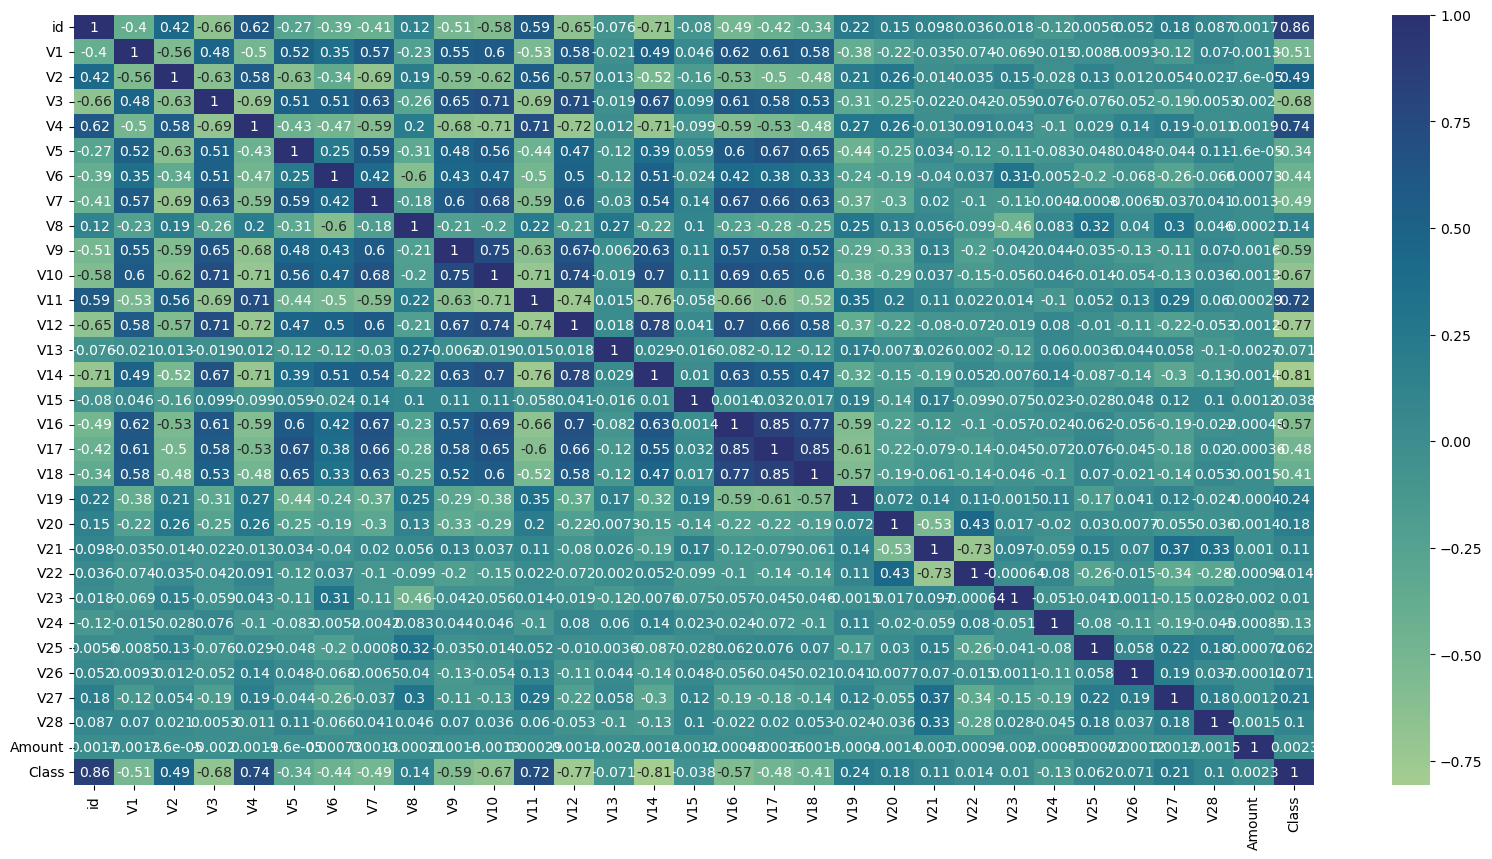

In [15]:
# Heatmap
HMpaper = plt.figure(figsize=[20,10])
sns.heatmap(dataset.corr(),cmap='crest',annot=True)
plt.show()

In [16]:
# Threshold for considering high correlation
threshold = 0.6

# Find pairs of highly correlated variables
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname1, colname2, correlation_matrix.iloc[i, j]))

# Display the highly correlated pairs
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

V3 and id: -0.66
V3 and V2: -0.63
V4 and id: 0.62
V4 and V3: -0.69
V5 and V2: -0.63
V7 and V2: -0.69
V7 and V3: 0.63
V8 and V6: -0.60
V9 and V3: 0.65
V9 and V4: -0.68
V9 and V7: 0.60
V10 and V2: -0.62
V10 and V3: 0.71
V10 and V4: -0.71
V10 and V7: 0.68
V10 and V9: 0.75
V11 and V3: -0.69
V11 and V4: 0.71
V11 and V9: -0.63
V11 and V10: -0.71
V12 and id: -0.65
V12 and V3: 0.71
V12 and V4: -0.72
V12 and V7: 0.60
V12 and V9: 0.67
V12 and V10: 0.74
V12 and V11: -0.74
V14 and id: -0.71
V14 and V3: 0.67
V14 and V4: -0.71
V14 and V9: 0.63
V14 and V10: 0.70
V14 and V11: -0.76
V14 and V12: 0.78
V16 and V1: 0.62
V16 and V3: 0.61
V16 and V7: 0.67
V16 and V10: 0.69
V16 and V11: -0.66
V16 and V12: 0.70
V16 and V14: 0.63
V17 and V1: 0.61
V17 and V5: 0.67
V17 and V7: 0.66
V17 and V10: 0.65
V17 and V11: -0.60
V17 and V12: 0.66
V17 and V16: 0.85
V18 and V5: 0.65
V18 and V7: 0.63
V18 and V16: 0.77
V18 and V17: 0.85
V19 and V17: -0.61
V22 and V21: -0.73
Class and id: 0.86
Class and V3: -0.68
Class and V4: 

In [ ]:
#Beberapa fitur memiliki korelasi tinggi di antara fitur-fitur yang berbeda.
#V17 dan V18 sangat terkait satu sama lain.
#V16 dan V17 sangat terkait satu sama lain.
#V14 memiliki korelasi negatif dengan V4.
#V12 juga berhubungan negatif dengan V10 dan V11.
#V11 secara aktif berhubungan dengan V10 dan secara positif dengan V4.
#V3 berhubungan positif dengan V10 dan V12.
#V9 dan V10 juga saling berhubungan secara positif.

In [17]:
# Skewness
dataset.skew()

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

In [ ]:
#Fitur seperti V1,V10,V23 memiliki kecenderungan yang sangat negatif.
#Kita akan melihat sebaran beberapa fitur tersebut.

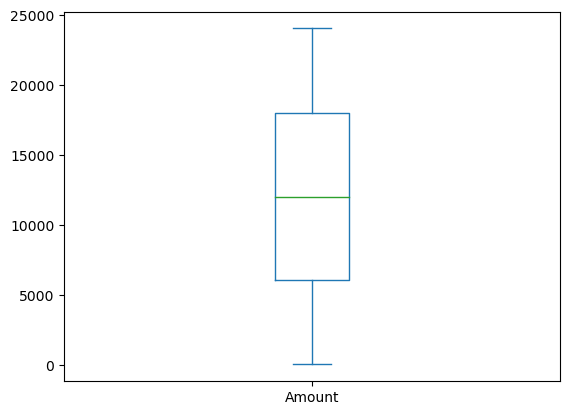

In [30]:
# Distribution of Amount Feature
dataset['Amount'].plot.box()

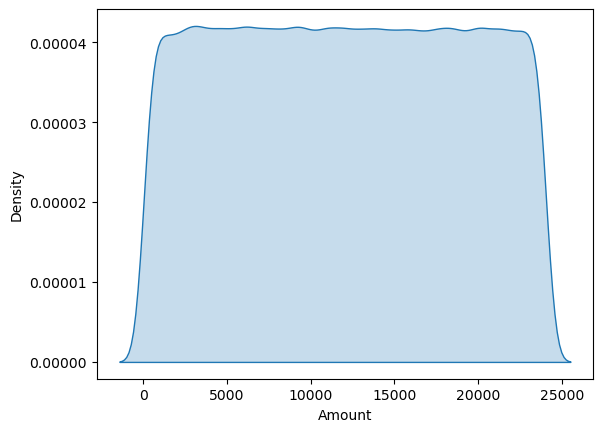

In [31]:
sns.kdeplot(data=dataset['Amount'], shade=True)
plt.show()

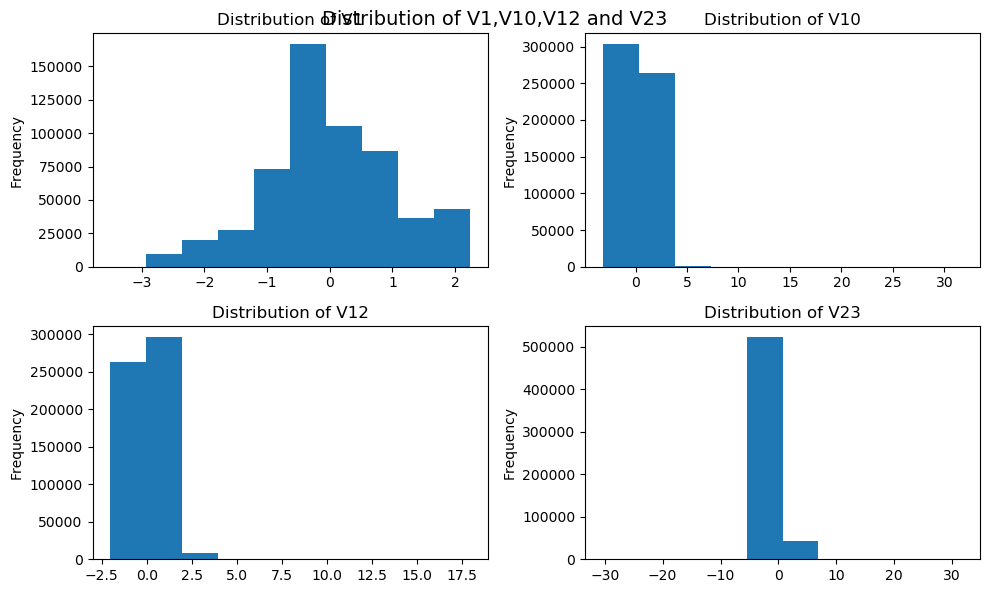

In [32]:
# fitur V1,V10,V23 dan V12
HMpaper, axes = plt.subplots(2, 2, figsize=(10, 6))
dataset['V1'].plot(kind='hist', ax=axes[0,0], title='Distribution of V1')
dataset['V10'].plot(kind='hist', ax=axes[0,1], title='Distribution of V10')
dataset['V12'].plot(kind='hist', ax=axes[1,0], title='Distribution of V12')
dataset['V23'].plot(kind='hist', ax=axes[1,1], title='Distribution of V23')
plt.suptitle('Distribution of V1,V10,V12 and V23',size=14)
plt.tight_layout()
plt.show()

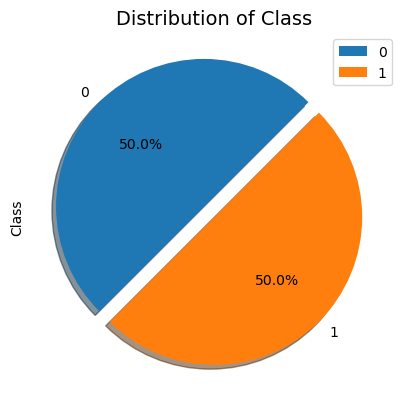

In [33]:
# fitur Output 
dataset['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

In [34]:
# Data Preparation
dataset.head()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [35]:
x = dataset.drop(['id','Class'],axis=1)
y = dataset.Class

In [36]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [37]:
print('Shape of x',x.shape)
print('Shape of y',y.shape)

Shape of x (568630, 29)
Shape of y (568630,)


In [38]:
sc = StandardScaler()

In [39]:
x_scaled = sc.fit_transform(x) 

In [40]:
x_scaled_data = pd.DataFrame(x_scaled,columns=x.columns)


In [41]:
x_scaled_data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


In [42]:
# Modelling
x_train,x_test,y_train,y_test = train_test_split(x_scaled_data, y, test_size=0.25, random_state=15, stratify= y)

In [43]:
#the shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426472, 29)
(142158, 29)
(426472,)
(142158,)


In [44]:
# Logistic Regression

#> Build a Logistic Regression Model    
log =  LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [45]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [46]:
predict_logTrain = log.predict(x_train)
predict_logTest = log.predict(x_test)

In [47]:
print('Training Accuracy (Logistic Regression)')
model_eval(y_train, predict_logTrain)

Training Accuracy (Logistic Regression)
Model Accuracy is:  0.97
[[208643   4593]
 [ 10330 202906]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    213236
           1       0.98      0.95      0.96    213236

    accuracy                           0.97    426472
   macro avg       0.97      0.97      0.97    426472
weighted avg       0.97      0.97      0.97    426472



In [48]:
print('Testing Accuracy (Logistic Regression)')
model_eval(y_test, predict_logTest)

Testing Accuracy (Logistic Regression)
Model Accuracy is:  0.96
[[69545  1534]
 [ 3520 67559]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     71079
           1       0.98      0.95      0.96     71079

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158



In [ ]:
# Logistic Regression Model is giving 96% Accuracy

In [49]:
# Decision Tree
dTree = DecisionTreeClassifier()
dTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
predict_TreeTrain = dTree.predict(x_train)
predict_TreeTest = dTree.predict(x_test)

In [51]:
print('Training Accuracy (Decision Tree)')
model_eval(y_train,predict_TreeTrain)


Training Accuracy (Decision Tree)
Model Accuracy is:  1.0
[[213236      0]
 [     0 213236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [52]:
print('Testing Accuracy (Decision Tree)')
model_eval(y_test,predict_TreeTest)

Testing Accuracy (Decision Tree)
Model Accuracy is:  1.0
[[70854   225]
 [   91 70988]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [ ]:
# Decision Tree Model is giving 100% Accuracy

In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


In [54]:
RandForest = RandomForestClassifier()
RandForest.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
predict_rfTrain = RandForest.predict(x_train)
predict_rfTest = RandForest.predict(x_test)

In [56]:
print('Training Accuracy Random Forest')
model_eval(y_train,predict_rfTrain)

Training Accuracy Random Forest
Model Accuracy is:  1.0
[[213236      0]
 [     0 213236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [57]:
print('Testing Accuracy Random Forest')
model_eval(y_test,predict_rfTest)

Testing Accuracy Random Forest
Model Accuracy is:  1.0
[[71061    18]
 [    0 71079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [42]:
# Rndom Forest Model is giving 100% Accuracy